In [1]:
#Imports

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import requests
import os
import tweepy
import json
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)
%matplotlib inline

##### Remember to use "pip install tweepy" in case of errors

## Gathering
   
#### The following will be the steps used to gather the needed data

1. **Twitter archive file:** download this file manually: twitter_archive_enhanced.csv

- **The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
    Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

In [2]:
# load the provided enhanced twitter archive file into a DataFrame
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [29]:
#URL downloaded programatically 

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
folder = 'image-predictions'

response = requests.get(url)

if not os.path.exists(folder):
    os.makedirs(folder)
    
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder)
img_predictions_df = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')

In [95]:
#Twitter Based Steps
## Authentication

key = "ZZZZ"
key_secret = "YYYY"
token = "XXXX"
token_secret = "WWWW"

auth = tweepy.OAuthHandler(key, key_secret)
auth.set_access_token(token, token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

In [98]:
tweets = []  #Tweets data

errors = []  # Tweets that can't be found are saved in the list below:

for id in twitter_archive_df['tweet_id']:   
    try:
        page = api.get_status(id)
        favorites = page._json['favorite_count']
        retweet_count = page._json['retweet_count']
        tweets.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)
                       })
        print(id, favorites, retweet_count)
    except Exception as e:
        errors.append(id)
        
print("The list of tweets" ,len(tweets))
print("The list of tweets no found" , len(errors))

892420643555336193 35954 7646
892177421306343426 31038 5650
891815181378084864 23356 3748
891689557279858688 39254 7813
891327558926688256 37496 8407
891087950875897856 18896 2822
890971913173991426 10978 1838
890729181411237888 60600 17061
890609185150312448 25995 3883
890240255349198849 29710 6641
890006608113172480 28592 6625
889880896479866881 26011 4505
889665388333682689 44765 9039
889638837579907072 25199 4052
889531135344209921 14125 2045
889278841981685760 23479 4825
888917238123831296 27129 4065
888804989199671297 23830 3832
888554962724278272 18389 3144
888078434458587136 20302 3138
887705289381826560 28193 4883
887517139158093824 43237 10658
887473957103951883 64073 16281
887343217045368832 31376 9481
887101392804085760 28561 5401
886983233522544640 32535 6937
886736880519319552 11172 2910
886680336477933568 20954 4052
886366144734445568 19704 2868
886267009285017600 111 4
886258384151887873 26089 5715
886054160059072513 0 100
885984800019947520 30376 6080
88552894320547020

838083903487373313 17511 3104
837820167694528512 33904 7790
837482249356513284 3835 440
837471256429613056 12713 2256
837110210464448512 15972 2346
836989968035819520 12709 2278
836753516572119041 19249 4608
836677758902222849 12566 2211
836648853927522308 0 554
836397794269200385 0 27312
836380477523124226 14702 2970
836260088725786625 21229 4270
836001077879255040 19020 4228
835685285446955009 0 8077
835574547218894849 17732 3597
835536468978302976 0 1689
835309094223372289 0 20796
835297930240217089 16419 2991
835264098648616962 7714 1689
835246439529840640 2091 73
835172783151792128 26073 5738
835152434251116546 22324 2996
834931633769889797 10767 1630
834786237630337024 21310 5464
834574053763584002 13618 2519
834477809192075265 0 10589
834458053273591808 9598 1674
834209720923721728 20529 4732
834167344700198914 15790 3646
834089966724603904 10028 2125
834086379323871233 13043 2197
833863086058651648 13406 2399
833826103416520705 18041 3759
833732339549220864 0 221
83372290175704

800388270626521089 11300 2852
800188575492947969 0 4008
800141422401830912 15493 2583
800018252395122689 28766 13370
799774291445383169 0 4764
799757965289017345 8517 2202
799422933579902976 8177 1957
799308762079035393 0 5552
799297110730567681 10034 2803
799063482566066176 8181 2503
798933969379225600 13277 4535
798925684722855936 7609 1466
798705661114773508 0 6750
798701998996647937 0 7912
798697898615730177 0 6627
798694562394996736 0 5043
798686750113755136 0 2372
798682547630837760 0 4792
798673117451325440 0 5632
798665375516884993 0 3975
798644042770751489 0 1882
798628517273620480 0 2009
798585098161549313 0 5797
798576900688019456 0 5939
798340744599797760 0 3398
798209839306514432 10564 2607
797971864723324932 11758 3160
797545162159308800 14750 4947
797236660651966464 20239 6688
797165961484890113 227 26
796904159865868288 0 9075
796865951799083009 7805 1952
796759840936919040 12001 3077
796563435802726400 0 7391
796484825502875648 7679 1785
796387464403357696 11153 4214
7

Rate limit reached. Sleeping for: 55


793226087023144960 9973 2916
793210959003287553 9054 2838
793195938047070209 15498 5714
793180763617361921 7034 2031
793165685325201412 9539 2832
793150605191548928 6261 1724
793135492858580992 6518 2537
793120401413079041 12834 3978
792913359805018113 14533 4041
792883833364439040 11464 4336
792773781206999040 7456 1701
792394556390137856 13633 4355
792050063153438720 7247 1828
791821351946420224 0 21406
791784077045166082 0 9728
791780927877898241 0 3878
791774931465953280 45732 22507
791672322847637504 11910 3183
791406955684368384 13322 4178
791312159183634433 8914 2573
791026214425268224 0 4166
790987426131050500 9960 2168
790946055508652032 16873 4758
790723298204217344 0 2345
790698755171364864 8329 1954
790581949425475584 20930 7254
790337589677002753 7933 1910
790277117346975746 12739 3222
790227638568808452 0 3621
789986466051088384 9389 2345
789960241177853952 0 4179
789903600034189313 10482 4195
789628658055020548 7593 1793
789599242079838210 6865 1955
789530877013393408 11

754120377874386944 7863 2355
753655901052166144 5828 2163
753420520834629632 7884 3557
753398408988139520 5741 1895
753375668877008896 7620 2320
753298634498793472 0 5683
753294487569522689 3362 1036
753039830821511168 37025 20795
753026973505581056 3912 962
752932432744185856 12597 6842
752917284578922496 6919 1570
752701944171524096 0 2849
752682090207055872 5988 1587
752660715232722944 4368 1550
752568224206688256 5478 2274
752519690950500352 7349 3428
752334515931054080 3802 1090
752309394570878976 0 16181
752173152931807232 5954 1831
751950017322246144 3050 910
751937170840121344 5176 1326
751830394383790080 5796 1938
751793661361422336 5807 2887
751598357617971201 7893 3028
751583847268179968 4378 1096
751538714308972544 5022 1258
751456908746354688 3205 995
751251247299190784 12464 5852
751205363882532864 6303 1805
751132876104687617 5052 1293
750868782890057730 4769 1355
750719632563142656 13127 5014
750506206503038976 4423 1137
750429297815552001 13124 4256
750383411068534784 

714957620017307648 4068 1391
714631576617938945 3228 981
714606013974974464 3582 912
714485234495041536 2647 1110
714258258790387713 2987 712
714251586676113411 3229 823
714214115368108032 2234 856
714141408463036416 4265 1375
713919462244790272 3247 780
713909862279876608 1865 530
713900603437621249 2797 732
713761197720473600 4791 1352
713411074226274305 4381 1281
713177543487135744 7124 2791
713175907180089344 4397 1454
712809025985978368 18800 6627
712717840512598017 12175 4905
712668654853337088 4125 1198
712438159032893441 5242 1541
712309440758808576 241 25
712097430750289920 3725 1016
712092745624633345 2903 874
712085617388212225 3228 479
712065007010385924 2235 611
711998809858043904 0 125
711968124745228288 7948 2266
711743778164514816 2800 973
711732680602345472 8721 4050
711694788429553666 32424 18065
711652651650457602 3806 900
711363825979756544 3601 1116
711306686208872448 3254 725
711008018775851008 2956 602
710997087345876993 4510 1372
710844581445812225 2510 678
7108

691675652215414786 1937 500
691483041324204033 2367 559
691459709405118465 4003 1125
691444869282295808 2620 842
691416866452082688 19115 7545
691321916024623104 2541 654
691096613310316544 2936 871
691090071332753408 1705 330
690989312272396288 5845 2835
690959652130045952 3545 1230
690938899477221376 4050 1926
690932576555528194 3248 1003
690735892932222976 3743 1252
690728923253055490 2157 509
690690673629138944 2304 810
690649993829576704 1289 276
690607260360429569 294 18
690597161306841088 1937 596
690400367696297985 1871 445
690374419777196032 3222 839
690360449368465409 2644 868
690348396616552449 1495 511
690248561355657216 1659 412
690021994562220032 2759 1018
690015576308211712 2464 725
690005060500217858 3625 1667
689999384604450816 1404 362
689993469801164801 1450 443
689977555533848577 1354 440
689905486972461056 2418 692
689877686181715968 3015 1149
689835978131935233 2154 740
689661964914655233 3191 922
689659372465688576 10275 3809


Rate limit reached. Sleeping for: 524


689623661272240129 2211 631
689599056876867584 11532 5451
689557536375177216 2025 451
689517482558820352 3365 1414
689289219123089408 2238 927
689283819090870273 3231 1088
689280876073582592 1962 699
689275259254616065 1134 242
689255633275777024 2527 1070
689154315265683456 3050 992
689143371370250240 2002 505
688916208532455424 2685 856
688908934925697024 2094 753
688898160958271489 2077 772
688894073864884227 2223 679
688828561667567616 1367 366
688804835492233216 956 191
688789766343622656 2201 654
688547210804498433 2568 688
688519176466644993 2298 717
688385280030670848 9187 4429
688211956440801280 2219 821
688179443353796608 2119 578
688116655151435777 2799 762
688064179421470721 1715 357
687841446767013888 5397 2473
687826841265172480 2716 1108
687818504314159109 2454 935
687807801670897665 2374 710
687732144991551489 1741 658
687704180304273409 2412 832
687664829264453632 1921 504
687494652870668288 1880 568
687480748861947905 1584 235
687476254459715584 1967 525
6874605060016

676219687039057920 74387 30118
676215927814406144 1687 556
676191832485810177 2220 1001
676146341966438401 1868 641
676121918416756736 2103 1125
676101918813499392 2748 1132
676098748976615425 2915 1374
676089483918516224 1274 425
675898130735476737 1564 555
675891555769696257 2062 826
675888385639251968 2307 927
675878199931371520 4063 1357
675870721063669760 1575 547
675853064436391936 2610 1249
675849018447167488 915 138
675845657354215424 2205 850
675822767435051008 1476 519
675820929667219457 1016 228
675798442703122432 9950 3306
675781562965868544 1583 452
675740360753160193 1129 328
675710890956750848 1828 788
675707330206547968 1910 658
675706639471788032 626 91
675534494439489536 1775 397
675531475945709568 1149 369
675522403582218240 1010 277
675517828909424640 1249 451
675501075957489664 16627 5632
675497103322386432 3033 1242
675489971617296384 1254 573
675483430902214656 1786 945
675432746517426176 1471 551
675372240448454658 1630 499
675362609739206656 1022 222
6753544359

670361874861563904 316 61
670338931251150849 407 101
670319130621435904 3720 1154
670303360680108032 416 123
670290420111441920 666 269
670093938074779648 986 316
670086499208155136 668 240
670079681849372674 2117 1158
670073503555706880 1489 747
670069087419133954 596 225
670061506722140161 730 314
670055038660800512 636 308
670046952931721218 618 162
670040295598354432 718 105
670037189829525505 568 258
670003130994700288 317 85
669993076832759809 311 79
669972011175813120 423 148
669970042633789440 289 54
669942763794931712 482 150
669926384437997569 361 92
669923323644657664 224 53
669753178989142016 772 375
669749430875258880 253 63
669684865554620416 492 86
669683899023405056 370 102
669682095984410625 339 128
669680153564442624 640 268
669661792646373376 774 410
669625907762618368 3359 1709
669603084620980224 912 341
669597912108789760 491 142
669583744538451968 1425 872
669573570759163904 418 131
669571471778410496 1520 962
669567591774625800 226 52
669564461267722241 373 116
6

In [ ]:
tweets_df = pd.DataFrame(tweets, columns = ['tweet_id', 'favorites', 'retweet_count'])

In [ ]:
tweets_df.to_csv('tweet_json.csv',encoding='utf-8',index=False)
tweets_df.to_csv('tweet_json.txt',encoding='utf-8',index=False)

In [30]:
#fixes rerunning the code below (reads the already save file from the above)

tweets_df = pd.read_csv('tweet_json.csv')

## Assessing Data

In [7]:
## checking Data
#### 1. info

twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2331 non-null   int64
 1   favorites      2331 non-null   int64
 2   retweet_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [10]:
### 2. heads
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
img_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
tweets_df.head()

,tweet_id,favorites,retweet_count
0,892420643555336193,35954,7646
1,892177421306343426,31038,5650
2,891815181378084864,23356,3748
3,891689557279858688,39254,7813
4,891327558926688256,37496,8407


In [13]:
### 3. Checking for duplicates

twitter_archive_df['tweet_id'].value_counts()   #nice

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64

In [14]:
twitter_archive_df['rating_numerator'].value_counts()  #quality error

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
twitter_archive_df['rating_denominator'].value_counts()  #quality error

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
twitter_archive_df['name'].value_counts() #quality_error

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
             ... 
Teddy           1
Gerbald         1
Longfellow      1
Pupcasso        1
Flash           1
Name: name, Length: 957, dtype: int64

In [17]:
twitter_archive_df['source'].value_counts() #quality_error

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Cleaning

###  A: Tidiness:

    1. Combine data frames
    2. Unify multiple columns mentioning dogs (doggo, floofer, pupper and puppo)
    3. Use best prediction in regard to images prediction

####  Define: 1. Combine dataframes
####  Code:

In [18]:
#Creating a copy to work on

twitter_archive_df_clean = twitter_archive_df.copy()
tweets_df_clean = tweets_df.copy()
img_predictions_df_clean = img_predictions_df.copy()

In [19]:
twitter_archive_df_clean = pd.merge(twitter_archive_df_clean, tweets_df_clean, 
                                    how = 'inner', on = 'tweet_id')
twitter_archive_df_clean = pd.merge(twitter_archive_df_clean, img_predictions_df_clean, 
                                    how = 'inner', on = 'tweet_id')

#### Test

In [20]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

In [21]:
twitter_archive_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorites', 'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

####  Define: 2. Unify multiple columns mentioning dogs (doggo, floofer, pupper and puppo)
####  Code:

In [22]:
'''
1st method that was used but not accurate enough

df1 = pd.melt(twitter_archive_df_clean, 
        id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name','favorites', 'retweet_count', 'jpg_url', 'img_num', 
       'p1', 'p1_conf','p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')         
'''


"\n1st method that was used but not accurate enough\n\ndf1 = pd.melt(twitter_archive_df_clean, \n        id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',\n       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',\n       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',\n       'rating_denominator', 'name','favorites', 'retweet_count', 'jpg_url', 'img_num', \n       'p1', 'p1_conf','p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], \n        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], \n        var_name = 'types', value_name = 'dog_type')         \n"

In [23]:
#remove None and nan values with empty space
twitter_archive_df_clean.doggo.replace('None', '', inplace=True)
twitter_archive_df_clean.doggo.replace(np.NaN, '', inplace=True)
twitter_archive_df_clean.floofer.replace('None', '', inplace=True)
twitter_archive_df_clean.floofer.replace(np.NaN, '', inplace=True)
twitter_archive_df_clean.pupper.replace('None', '', inplace=True)
twitter_archive_df_clean.pupper.replace(np.NaN, '', inplace=True)
twitter_archive_df_clean.puppo.replace('None', '', inplace=True)
twitter_archive_df_clean.puppo.replace(np.NaN, '', inplace=True)

#showing groups
twitter_archive_df_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1741
1,,,,puppo,23
2,,,pupper,,210
3,,floofer,,,7
4,doggo,,,,65
5,doggo,,,puppo,1
6,doggo,,pupper,,11
7,doggo,floofer,,,1


In [24]:
#combining groups to a coulmn
twitter_archive_df_clean['stage'] = twitter_archive_df_clean.doggo + twitter_archive_df_clean.floofer + twitter_archive_df_clean.pupper + twitter_archive_df_clean.puppo

#separating combined names with a comma
twitter_archive_df_clean.loc[twitter_archive_df_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_df_clean.loc[twitter_archive_df_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_df_clean.loc[twitter_archive_df_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

#### Test

In [25]:
#check types of dogs available
twitter_archive_df_clean.stage.value_counts()

                  1741
pupper             210
doggo               65
puppo               23
doggo, pupper       11
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

In [26]:
#Test for duplication in tweet ids
twitter_archive_df_clean.tweet_id.value_counts() #no duplicate values

685532292383666176    1
743210557239623680    1
798644042770751489    1
743510151680958465    1
833722901757046785    1
                     ..
713175907180089344    1
670338931251150849    1
843604394117681152    1
770772759874076672    1
700151421916807169    1
Name: tweet_id, Length: 2059, dtype: int64

####  Define: 3. Use best prediction in regards to images prediction
####  Code:

In [31]:
# create 2 empty lists to save our choice for each row in the dataset
## in case of key error just run In[29] once (the html calling code)

breed = []
confidence = []

# function to select best prediction for breed of dogs.

def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# apply the function to the entire column

twitter_archive_df_clean.apply(breed_confidence, axis=1)

# add lists created to clean dataframe

twitter_archive_df_clean['breed'] = breed
twitter_archive_df_clean['confidence'] = confidence

#### Test

In [33]:
twitter_archive_df_clean.head() #merged successfully

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,,Unknown,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,,basset,0.555712


###  B: Quality:
##### Other changes where done while working during assessing and gathering steps

    1. Remove retweets and meme replies
    2. Remove unwanted and extra columns
    3. Fix data types
    4. Fix timestamp data types
    5. Correct Numerators
    6. Correct Denominators
    7. Fix some generic dogs names
    8. Fix column names with better indicators

In [34]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

#### Define: 1. Remove retweets and meme replies
#### Code

In [36]:
twitter_archive_df_clean = twitter_archive_df_clean[pd.isnull(twitter_archive_df_clean['retweeted_status_user_id'])]

twitter_archive_df_clean = twitter_archive_df_clean[pd.isnull(twitter_archive_df_clean['in_reply_to_status_id'])]

#### Test

In [37]:
twitter_archive_df_clean.info() #all removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1964 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1964 non-null   object 
 4   source                      1964 non-null   object 
 5   text                        1964 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1964 non-null   object 
 10  rating_numerator            1964 non-null   int64  
 11  rating_denominator          1964 non-null   int64  
 12  name                        1964 non-null   object 
 13  doggo                       1964 

#### Define: 2. Remove unwanted and extra columns
#### Code

In [38]:
twitter_archive_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorites', 'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'stage',
       'breed', 'confidence'],
      dtype='object')

In [ ]:
twitter_archive_df_clean.drop(['in_reply_to_status_id',
                               'in_reply_to_user_id',
                               'source',
                               'retweeted_status_id',
                               'retweeted_status_user_id', 
                               'retweeted_status_timestamp', 
                               'expanded_urls',
                               'jpg_url', 'img_num',
                               'p1', 'p1_conf', 'p1_dog',
                               'p2', 'p2_conf', 'p2_dog',
                               'p3', 'p3_conf', 'p3_dog',
                              ], 1, inplace = True)
# Types coulmn is populated incorrectly with incorrect values (old method removed from list but added doggo, ..etc)
#maybe think of leaving jpg_url in future scopes

In [45]:
#twitter_archive_df_clean.drop(['types'], 1, inplace = True)
twitter_archive_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], 1, inplace = True)

#### Test

In [48]:
twitter_archive_df_clean.sample(50)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorites,retweet_count,stage,breed,confidence
140,858843525470990336,2017-05-01 00:40:27 +0000,I have stumbled puppon a doggo painting party....,13,10,None,14940,3291,doggo,golden_retriever,0.578120
1286,689599056876867584,2016-01-20 00:03:21 +0000,Here we see 33 dogs posing for a picture. All ...,11,10,None,11532,5451,,cocker_spaniel,0.073101
114,865006731092295680,2017-05-18 00:50:50 +0000,This is Nelly. He really hopes you like his Ha...,13,10,Nelly,26589,7163,,Pembroke,0.989882
206,842535590457499648,2017-03-17 00:38:32 +0000,This is Winnie. She lost her body saving a chi...,13,10,Winnie,17920,3459,,Pembroke,0.685084
1100,705591895322394625,2016-03-04 03:13:11 +0000,"""Ma'am, for the last time, I'm not authorized ...",11,10,None,3127,1136,,basenji,0.877207
569,783334639985389568,2016-10-04 15:55:06 +0000,This is Dave. He's currently in a predicament....,12,10,Dave,29444,11807,,Cardigan,0.593858
953,723179728551723008,2016-04-21 16:00:57 +0000,This is Jangle. She's addicted to broccoli. It...,8,10,Jangle,5229,1834,,Norwegian_elkhound,0.056850
869,739844404073074688,2016-06-06 15:40:26 +0000,This is Simba. He's the grand prize. The troph...,12,10,Simba,3765,848,,toy_poodle,0.342397
374,815736392542261248,2017-01-02 01:48:06 +0000,This is Akumi. It's his birthday. He received ...,11,10,Akumi,9935,2284,,Border_collie,0.548907
1979,667453023279554560,2015-11-19 21:22:56 +0000,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,296,84,,Labrador_retriever,0.825670


In [49]:
twitter_archive_df_clean.stage.value_counts() #seems decent

                  1662
pupper             201
doggo               62
puppo               22
doggo, pupper        8
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

#### Define: 3. Fix tweet_id data types
#### Code

In [50]:
twitter_archive_df_clean.tweet_id = twitter_archive_df_clean.tweet_id.astype(str)

#### Test

In [51]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1964 non-null   object 
 1   timestamp           1964 non-null   object 
 2   text                1964 non-null   object 
 3   rating_numerator    1964 non-null   int64  
 4   rating_denominator  1964 non-null   int64  
 5   name                1964 non-null   object 
 6   favorites           1964 non-null   int64  
 7   retweet_count       1964 non-null   int64  
 8   stage               1964 non-null   object 
 9   breed               1964 non-null   object 
 10  confidence          1964 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 184.1+ KB


#### Define: 4. Fix timestamp data types
#### Code

In [52]:
#timestamp should be datetime

twitter_archive_df_clean['timestamp'] = pd.to_datetime(twitter_archive_df_clean['timestamp'])

#extract year, month and day to new columns

twitter_archive_df_clean['year'] = twitter_archive_df_clean['timestamp'].dt.year
twitter_archive_df_clean['month'] = twitter_archive_df_clean['timestamp'].dt.month
twitter_archive_df_clean['day'] = twitter_archive_df_clean['timestamp'].dt.day

#Finally drop timestamp column

twitter_archive_df_clean = twitter_archive_df_clean.drop('timestamp', 1)

#### Test

In [57]:
twitter_archive_df_clean.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,favorites,retweet_count,stage,breed,confidence,year,month,day
636,772581559778025472,Guys this is getting so out of hand. We only r...,10,10,a,6534,1704,,Newfoundland,0.574345,2016,9,4
216,840370681858686976,You have been visited by the magical sugar jar...,13,10,None,16331,4493,,Unknown,0.000000,2017,3,11
219,839549326359670784,Meet Winston. He knows he's a little too big f...,12,10,Winston,27263,7664,,Norwich_terrier,0.052480,2017,3,8
510,793165685325201412,This is Benji. He's Air Bud. It's a low effort...,12,10,Benji,9539,2832,,golden_retriever,0.946224,2016,10,31
619,775729183532220416,This girl straight up rejected a guy because h...,13,10,None,13067,4624,,Unknown,0.000000,2016,9,13
960,720415127506415616,Garden's coming in nice this year. 10/10 https...,10,10,None,4066,1476,,Rottweiler,0.990312,2016,4,14
534,789268448748703744,This is Stella. She's happier than I will ever...,10,10,Stella,9225,2640,,malamute,0.812860,2016,10,21
1694,672884426393653248,Marvelous dog here. Rad ears. Not very soft. L...,6,10,None,1482,802,,Unknown,0.000000,2015,12,4
1794,670797304698376195,This is Trigger. He was minding his own busine...,11,10,Trigger,706,223,,Pembroke,0.472197,2015,11,29
904,733109485275860992,"Like father (doggo), like son (pupper). Both 1...",12,10,None,49603,16625,"doggo, pupper",golden_retriever,0.945523,2016,5,19


#### Define: 5. Correct Numerators
#### Define: 6. Correct Denominators
#### Code

In [102]:
ratings = twitter_archive_df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings.rename(columns={0: 'num', 1: 'den' }, inplace=True)
ratings[['num', 'den']] = ratings[['num','den']].astype(float)
ratings.num.value_counts()

12.00      444
10.00      416
11.00      392
13.00      249
9.00       150
8.00        95
7.00        52
14.00       33
6.00        32
5.00        32
3.00        19
4.00        16
2.00         9
1.00         5
60.00        1
24.00        1
99.00        1
1776.00      1
13.50        1
11.27        1
165.00       1
11.26        1
0.00         1
84.00        1
9.75         1
45.00        1
88.00        1
144.00       1
44.00        1
121.00       1
204.00       1
50.00        1
80.00        1
420.00       1
Name: num, dtype: int64

In [99]:
ratings.num.dtype, ratings.den.dtype

(dtype('float64'), dtype('float64'))

In [100]:
twitter_archive_df_clean['rating'] = ratings['num']
twitter_archive_df_clean['out_of'] = ratings['den']
twitter_archive_df_clean.sample(10) #check last 2 coulumns... Yeet!

,tweet_id,text,rating_numerator,rating_denominator,name,favorites,retweet_count,stage,breed,confidence,year,month,day,rating,out_of
1906,668645506898350081,Incredibly rare dog here. Good at bipedalism. ...,11.0,10.0,None,833,502,,Unknown,0.000000,2015,11,23,11.0,10.0
188,847116187444137987,Unbelievable... We. Only. Rate. Dogs. Please s...,11.0,10.0,None,21126,3113,,American_Staffordshire_terrier,0.113434,2017,3,29,11.0,10.0
258,832397543355072512,This is Eevee. She wants to see how you're doi...,12.0,10.0,Eevee,11955,2217,,Pekinese,0.988916,2017,2,17,12.0,10.0
1707,672523490734551040,When she says she'll be ready in a minute but ...,10.0,10.0,None,604,160,,golden_retriever,0.565981,2015,12,3,10.0,10.0
1719,672245253877968896,Meet Snickers. He's adorable. Also comes in t-...,12.0,10.0,Snickers,656,147,,Chihuahua,0.718944,2015,12,3,12.0,10.0
1628,674269164442398721,This is Bob. He's a Juniper Fitzsimmons. His b...,8.0,10.0,Bob,879,221,,pug,0.622921,2015,12,8,8.0,10.0
362,817171292965273600,This is Tebow. He kindly requests that you put...,13.0,10.0,Tebow,8848,2042,,golden_retriever,0.295483,2017,1,6,13.0,10.0
1153,700167517596164096,This is Dotsy. She's stuck as hell. 10/10 http...,10.0,10.0,Dotsy,2606,722,,beagle,0.162585,2016,2,18,10.0,10.0
308,825026590719483904,Say hello to Pablo. He's one gorgeous puppo. A...,12.0,10.0,Pablo,6330,1261,puppo,Eskimo_dog,0.524454,2017,1,27,12.0,10.0
1836,670290420111441920,This is Sandra. She's going skydiving. Nice ad...,11.0,10.0,Sandra,666,269,,Chihuahua,0.368876,2015,11,27,11.0,10.0


In [105]:
twitter_archive_df_clean.loc[twitter_archive_df_clean['out_of'] == 7 ]

,tweet_id,text,rating_numerator,rating_denominator,name,favorites,retweet_count,stage,breed,confidence,year,month,day,rating,out_of
406,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7.0,Sam,5403,1458,,golden_retriever,0.871342,2016,12,19,10.0,7.0


In [108]:
# change fun ratings ">10" to 10

twitter_archive_df_clean['rating'].values[twitter_archive_df_clean['rating'].values > 10] = 10
twitter_archive_df_clean['out_of'].values[twitter_archive_df_clean['out_of'].values > 10] = 10

10.00    1552
9.00      151
8.00       95
7.00       52
5.00       32
6.00       32
3.00       19
4.00       16
2.00        9
1.00        4
9.75        1
0.00        1
Name: rating, dtype: int64

In [106]:
# fixing manual values
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == '666287406224695296'), 'rating'] = 9
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == '810984652412424192'), 'rating'] = 10
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == '666287406224695296'), 'out_of'] = 10
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == '810984652412424192'), 'out_of'] = 10

#### Test

In [109]:
twitter_archive_df_clean.rating.value_counts()
#some minority values with the number 7 actually meant 7/11 but it can be neglected

10.00    1552
9.00      151
8.00       95
7.00       52
5.00       32
6.00       32
3.00       19
4.00       16
2.00        9
1.00        4
9.75        1
0.00        1
Name: rating, dtype: int64

In [110]:
twitter_archive_df_clean.out_of.value_counts()

10.0    1964
Name: out_of, dtype: int64

In [80]:
## (old method) twitter_archive_df_clean[['rating_numerator','rating_denominator']] = twitter_archive_df_clean[['rating_numerator','rating_denominator']].astype(float)
## (old method) twitter_archive_df_clean.rating_numerator.value_counts()

In [81]:
## (old method) twitter_archive_df_clean.rating_denominator.value_counts()

In [ ]:
## (old method) let's check the df to investigate the wierd values to normalize

## (old method) twitter_archive_df_clean.loc[twitter_archive_df_clean['rating_denominator'] == 50]  #tried for 20 & 11 aswell, indicates awesomness

In [96]:
## (old method) twitter_archive_df_clean.loc[twitter_archive_df_clean['rating_numerator'] == 13]  #tried for 11,12 & 14, indicates awesomness

In [122]:
### Checking the above tweets it is safe to assume anything greater than 10 can be normalized to 10/10
### 7 & 2 values requires manual edits to fix numerator
#666287406224695296, 810984652412424192

## (old method) twitter_archive_df_clean['rating_denominator'].values[twitter_archive_df_clean['rating_denominator'].values > 0] = 10
## (old method) twitter_archive_df_clean['rating_numerator'].values[twitter_archive_df_clean['rating_numerator'].values > 10] = 10


In [134]:
## fixing numerators manually

## (old method) twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == '666287406224695296'), 'rating_numerator'] = 9
## (old method) twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == '810984652412424192'), 'rating_numerator'] = 10

#### Define: 7. Fix some generic dogs names
#### Code

In [112]:
#found by looking at the csv file filter
non_names = ['a', 'an', '0', 'old', 'the', 'just', 'incredibly', 'by', 'his', 'such',
             'one', 'very',  'actually', 'infuriating', 'all',
             'mad', 'space', 'quite', 'not', 'officially',  'life',
             'unacceptable', 'my']

for name in twitter_archive_df_clean.name:
    if name in non_names:
        twitter_archive_df_clean.name[twitter_archive_df_clean.name == name] = 'None'

#### Test

In [113]:
twitter_archive_df_clean.name.value_counts()

None       618
Oliver      10
Charlie     10
Cooper      10
Lucy         9
          ... 
Moofasa      1
Cheesy       1
Jeremy       1
Ridley       1
Flash        1
Name: name, Length: 914, dtype: int64

#### Define: 8. Fix column names with better indicators
#### Code

In [114]:
twitter_archive_df_clean.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'favorites', 'retweet_count', 'stage', 'breed', 'confidence', 'year',
       'month', 'day', 'rating', 'out_of'],
      dtype='object')

In [115]:
twitter_archive_df_clean.rename(columns={'text': 'tweet_content', 'name':'dog name' }, inplace=True)
# num and den are fixed previously
# let's drop 'rating_numerator', 'rating_denominator' as well since they are no longer needed
twitter_archive_df_clean.drop(['rating_numerator', 'rating_denominator'], 1, inplace = True)

#### Test

In [118]:
twitter_archive_df_clean.columns

Index(['tweet_id', 'tweet_content', 'dog name', 'favorites', 'retweet_count',
       'stage', 'breed', 'confidence', 'year', 'month', 'day', 'rating',
       'out_of'],
      dtype='object')

In [119]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       1964 non-null   object 
 1   tweet_content  1964 non-null   object 
 2   dog name       1964 non-null   object 
 3   favorites      1964 non-null   int64  
 4   retweet_count  1964 non-null   int64  
 5   stage          1964 non-null   object 
 6   breed          1964 non-null   object 
 7   confidence     1964 non-null   float64
 8   year           1964 non-null   int64  
 9   month          1964 non-null   int64  
 10  day            1964 non-null   int64  
 11  rating         1964 non-null   float64
 12  out_of         1964 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 214.8+ KB


### Storing Data

In [120]:
#Store the clean DataFrame in a CSV file
twitter_archive_df_clean.to_csv('twitter_archive_master.csv', 
                                index=False, encoding = 'utf-8')

### Analysis

#### Questions to answer:

###### General descriptive values
###### What is the most popular rating? 
###### What does the relationship between retweets and favorites look like?
###### What is the most popular dog breed?
###### What is the most  and least favorited tweets to date? (5 each)

In [121]:
# First a quick describe
twitter_archive_df_clean.describe()

,favorites,retweet_count,confidence,year,month,day,rating,out_of
count,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.0
mean,8269.781568,2451.647149,0.465133,2015.845214,7.170061,16.038187,9.423498,10.0
std,12157.715778,4379.375348,0.339506,0.698206,4.119286,8.930083,1.456679,0.0
min,70.000000,11.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,10.0
25%,1775.750000,545.000000,0.140339,2015.000000,3.000000,8.000000,10.000000,10.0
50%,3737.500000,1186.000000,0.459560,2016.000000,7.000000,16.000000,10.000000,10.0
75%,10322.500000,2800.000000,0.776453,2016.000000,11.000000,24.000000,10.000000,10.0
max,155136.000000,77112.000000,0.999956,2017.000000,12.000000,31.000000,10.000000,10.0


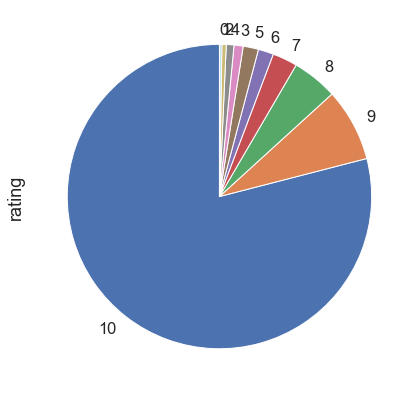

In [122]:
# 1. most popular rating
rating_int = twitter_archive_df_clean.rating.astype(int)
rating_int = rating_int.value_counts()
plot = rating_int.plot.pie(y='mass', figsize=(7, 7), startangle=90)

plt.savefig('distribution_of_ratings')

**More than 75% gave the dogs a rating of 10/10!!**

**This shows heavy bias and even though they must have had cons, their owners were more than happy to disregard**

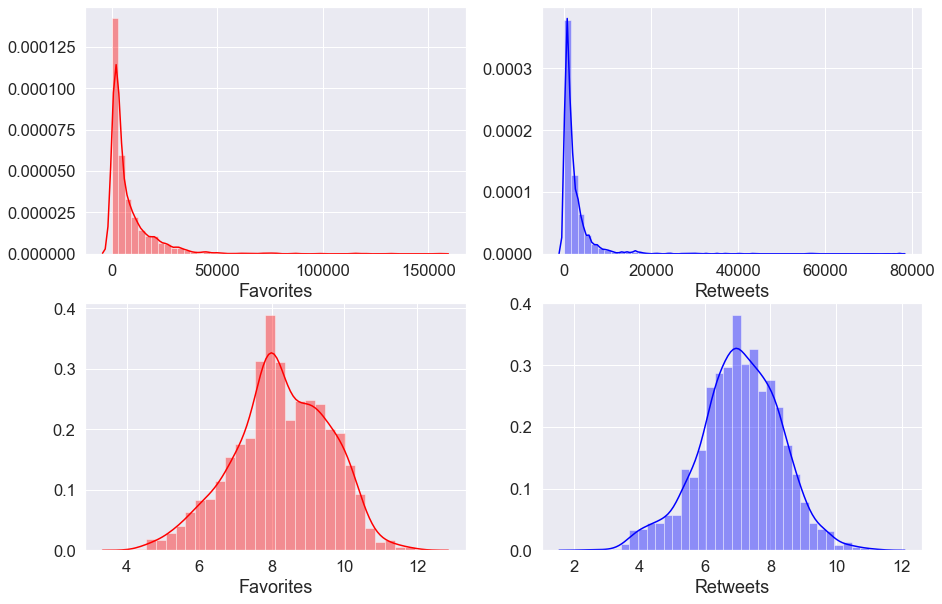

In [123]:
# 2. relation between favorites and retweets
f, axes = plt.subplots(2,2,figsize=(15,10),sharex=False)
sns.distplot(twitter_archive_df_clean.favorites, color = 'red', ax=axes[0,0], axlabel = 'Favorites')
sns.distplot(twitter_archive_df_clean.retweet_count, color = 'blue', ax=axes[0,1], axlabel = 'Retweets')
sns.distplot(twitter_archive_df_clean.favorites.apply(np.log), color = 'red', ax=axes[1,0], axlabel = 'Favorites')
sns.distplot(twitter_archive_df_clean.retweet_count.apply(np.log), color = 'blue', ax=axes[1,1], axlabel = 'Retweets')

f.savefig('Favorites_vs_retweets.png')

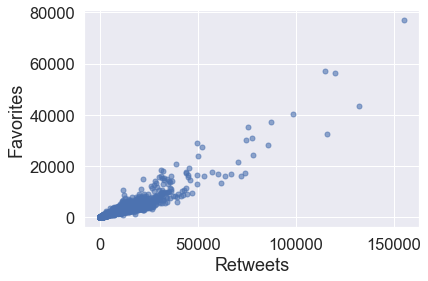

In [124]:
# 3. more relations between favorites and retweets
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.scatter(twitter_archive_df_clean.favorites, twitter_archive_df_clean.retweet_count,
            s= 25, alpha = 0.6)

plt.savefig('favorites_vs_retweet_scatter')

**The 2 graphs look very similar but in a different method of representation**

**What it shows is the direct proportionality between favoriting a tweet and retweeting it**

**It seems it has to do with reach and cuteness**

**I mean, who can resist such cute fellas**

In [126]:
# 4. most popular dog breed

doggo = twitter_archive_df_clean[twitter_archive_df_clean.stage != '']
doggo.stage.value_counts()

pupper            201
doggo              62
puppo              22
doggo, pupper       8
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: stage, dtype: int64

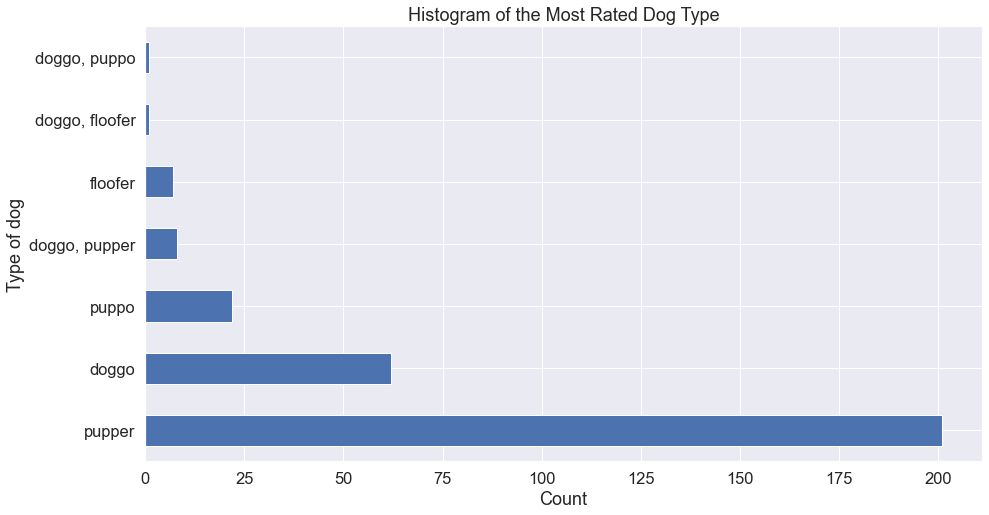

In [134]:
fig = plt.figure(figsize=(15,8))
doggo['stage'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

plt.savefig('popular_dog')

In [160]:
bar_df = twitter_archive_df_clean.copy()
bar_df.breed.replace('Unknown', '', inplace=True)
bar_df_2 = bar_df[bar_df['breed'] != '']

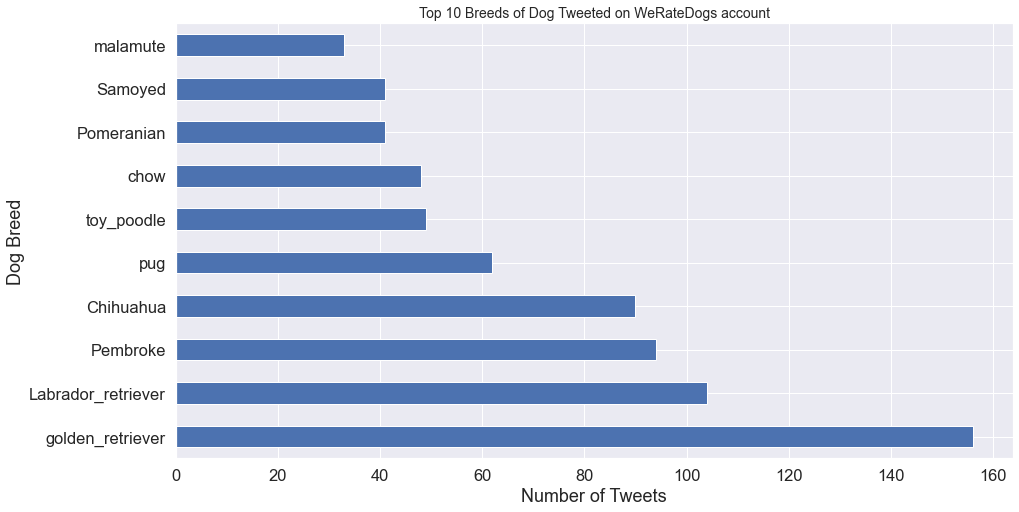

In [165]:
fig = plt.figure(figsize=(15,8))
bar_df_2.groupby('breed').count()['rating'].sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.title("Top 10 Breeds of Dog Tweeted on WeRateDogs account",fontsize=14)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Tweets"); 

plt.savefig('popular_dog_breed')

**It seems that a golden retriever pupper is the goddest of good boys**

**Shown above are the top heart melting dogs in order of most famous**

In [166]:
# 5. Most and least favorited Tweets

twitter_archive_df_clean.sort_values(by = 'favorites', ascending = False).head(5)

,tweet_id,tweet_content,dog name,favorites,retweet_count,stage,breed,confidence,year,month,day,rating,out_of
838,744234799360020481,Here's a doggo realizing you can stand in a po...,None,155136,77112,doggo,Labrador_retriever,0.825333,2016,6,18,10.0,10.0
320,822872901745569793,Here's a super supportive puppo participating ...,None,132251,43466,puppo,Lakeland_terrier,0.196015,2017,1,21,10.0,10.0
423,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,Stephan,119818,56196,,Chihuahua,0.505370,2016,12,9,10.0,10.0
110,866450705531457537,This is Jamesy. He gives a kiss to every other...,Jamesy,115747,32677,pupper,French_bulldog,0.905334,2017,5,22,10.0,10.0
873,739238157791694849,Here's a doggo blowing bubbles. It's downright...,None,114660,57266,doggo,Eskimo_dog,0.503372,2016,6,4,10.0,10.0


In [167]:
twitter_archive_df_clean.sort_values(by = 'favorites', ascending = True).head(5)

,tweet_id,tweet_content,dog name,favorites,retweet_count,stage,breed,confidence,year,month,day,rating,out_of
2042,666102155909144576,Oh my. Here you are seeing an Adobe Setter giv...,None,70,11,,English_setter,0.298617,2015,11,16,10.0,10.0
2054,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,None,96,40,,miniature_pinscher,0.560311,2015,11,16,5.0,10.0
2040,666268910803644416,Very concerned about fellow dog trapped in com...,None,96,32,,Unknown,0.000000,2015,11,16,10.0,10.0
2022,666447344410484738,This is Scout. She is a black Downton Abbey. I...,Scout,97,18,,curly-coated_retriever,0.322084,2015,11,17,9.0,10.0
2030,666407126856765440,This is a southern Vesuvius bumblegruff. Can d...,None,99,32,,black-and-tan_coonhound,0.529139,2015,11,17,7.0,10.0


**This shows the most popular and least popluar tweets**

**The rating of the dog didn't affet the popularity rather the image and the dog breed played an important factor to make the dog more favorable**
